In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Malignant comments train.csv')
test = pd.read_csv('Malignant comments test.csv')

In [3]:
train.head(20)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
pd.set_option('display.max_colwidth', -1)
train.head(20)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0,0,0,0,0,0
8,00037261f536c51d,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,0,0,0,0,0


In [6]:
train.shape, test.shape

((159571, 8), (153164, 2))

In [7]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [9]:
train.apply(lambda x: len(x.unique()))

id                  159571
comment_text        159571
malignant           2     
highly_malignant    2     
rude                2     
threat              2     
abuse               2     
loathe              2     
dtype: int64

In [10]:
cols_target = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [11]:
train['txt length'] = train['comment_text'].apply(len)

In [12]:
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'loathful comments')

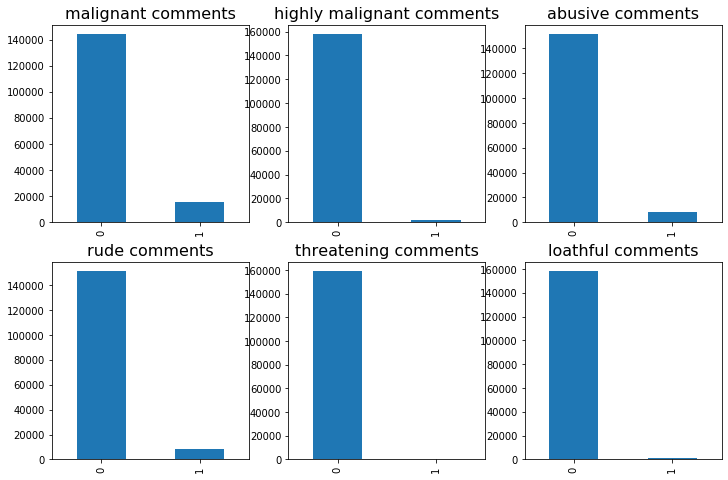

In [13]:
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
train['malignant'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("malignant comments", fontsize=16)
train['highly_malignant'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("highly malignant comments", fontsize=16)
train['rude'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("rude comments", fontsize=16)
train['threat'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("threatening comments", fontsize=16)
train['abuse'].value_counts().sort_index().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title("abusive comments", fontsize=16)
train['loathe'].value_counts().sort_index().plot.bar(ax=axarr[1][2])
axarr[1][2].set_title("loathful comments", fontsize=16)

In [14]:
train = train.drop('id', axis = 1)                #dropping id column

In [15]:
test = test.drop('id', axis = 1)                #dropping id column

In [16]:
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,txt length
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67


In [17]:
import re                          #using regex to clean text, removing digits, lowercasing text etc.
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    # remove numbers
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

In [18]:
train = clean_text(train, 'comment_text')
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,txt length
0,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0,264
1,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0,112
2,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0,233
3,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember what page that s on,0,0,0,0,0,0,67


In [19]:
test = clean_text(test, 'comment_text')
test.head()

,comment_text
0,yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message
4,i don t anonymously edit articles at all


In [20]:
import nltk.corpus                               #removing stopwords from the clean text
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,txt length
0,explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired,0,0,0,0,0,0,264
1,aww matches background colour seemingly stuck thanks talk january utc,0,0,0,0,0,0,112
2,hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0,233
3,make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later one else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0,622
4,sir hero chance remember page,0,0,0,0,0,0,67


In [21]:
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test.head()

,comment_text
0,yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother fuckin white boys get things right next time
1,rfc title fine imo
2,sources zawe ashton lapland
3,look back source information updated correct form guess source updated shall update information thank message
4,anonymously edit articles


In [22]:
from wordcloud import WordCloud
from collections import Counter

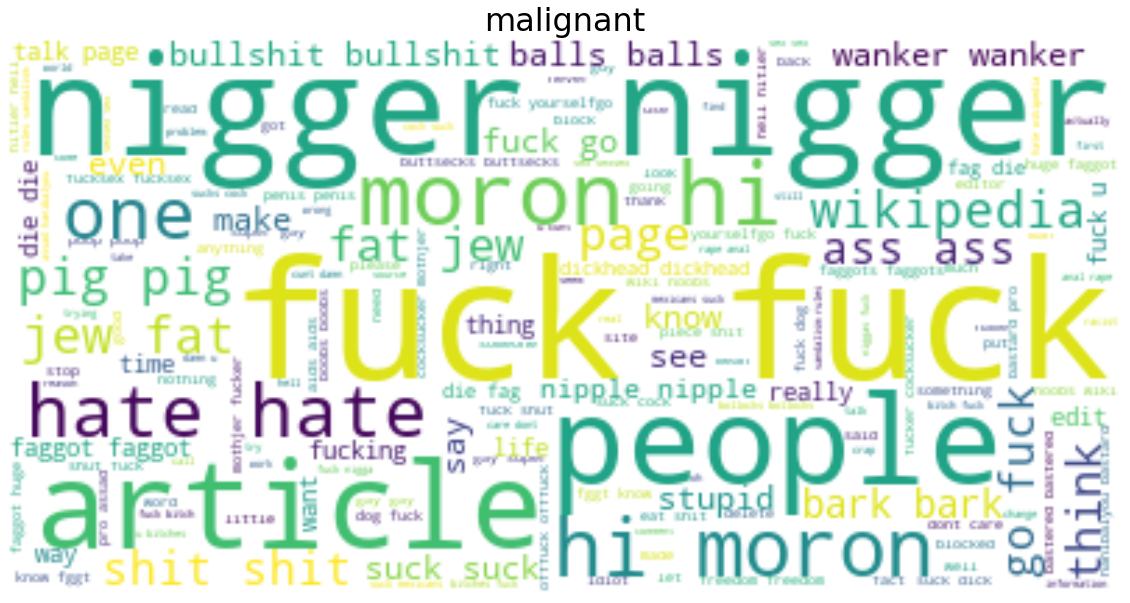

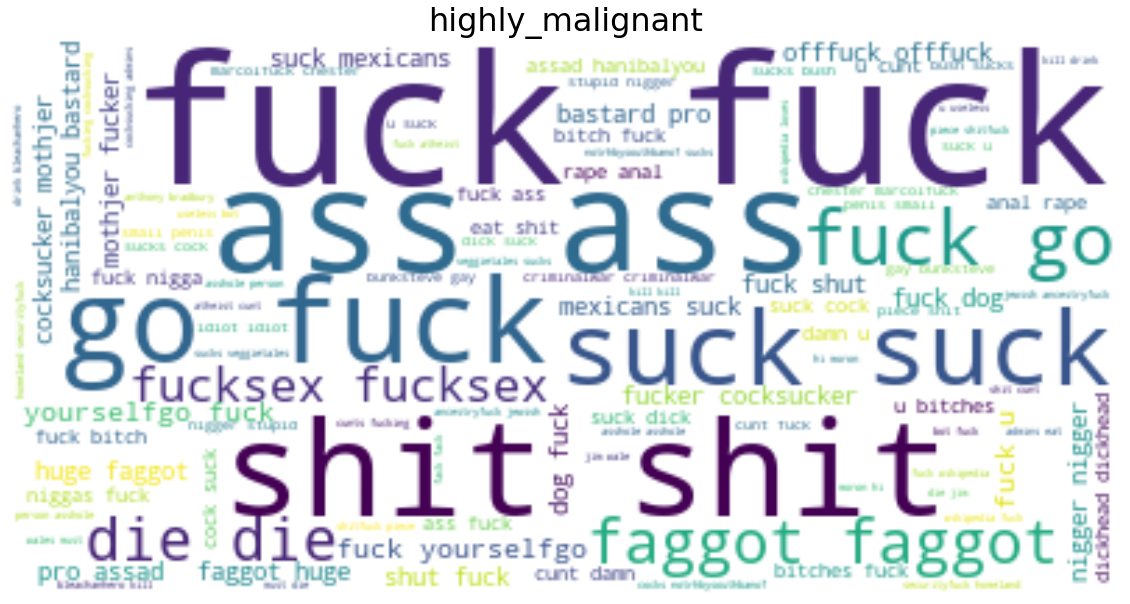

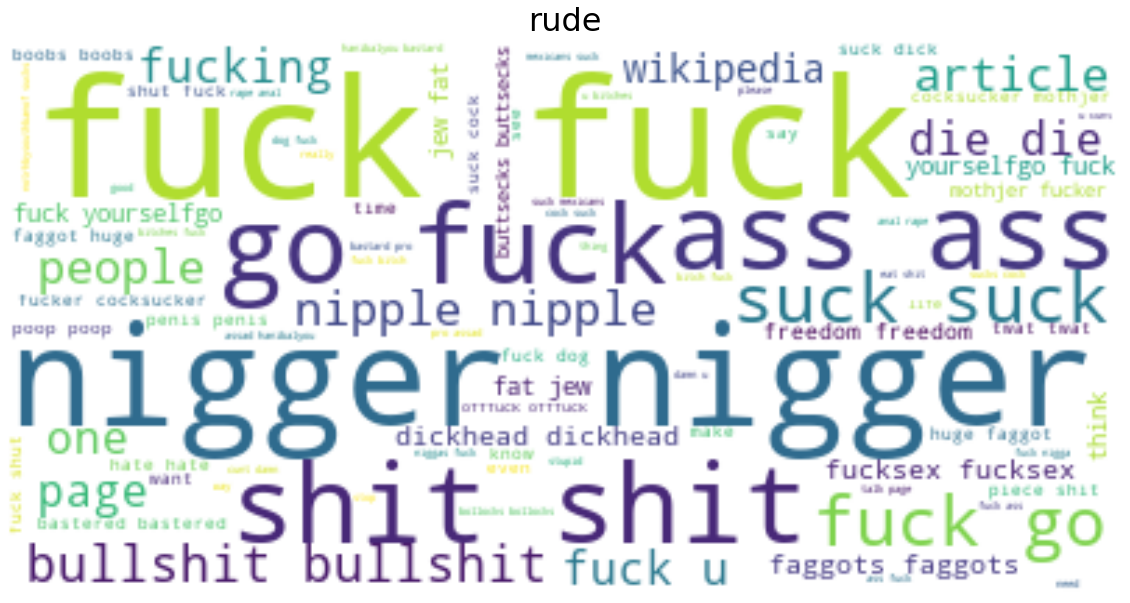

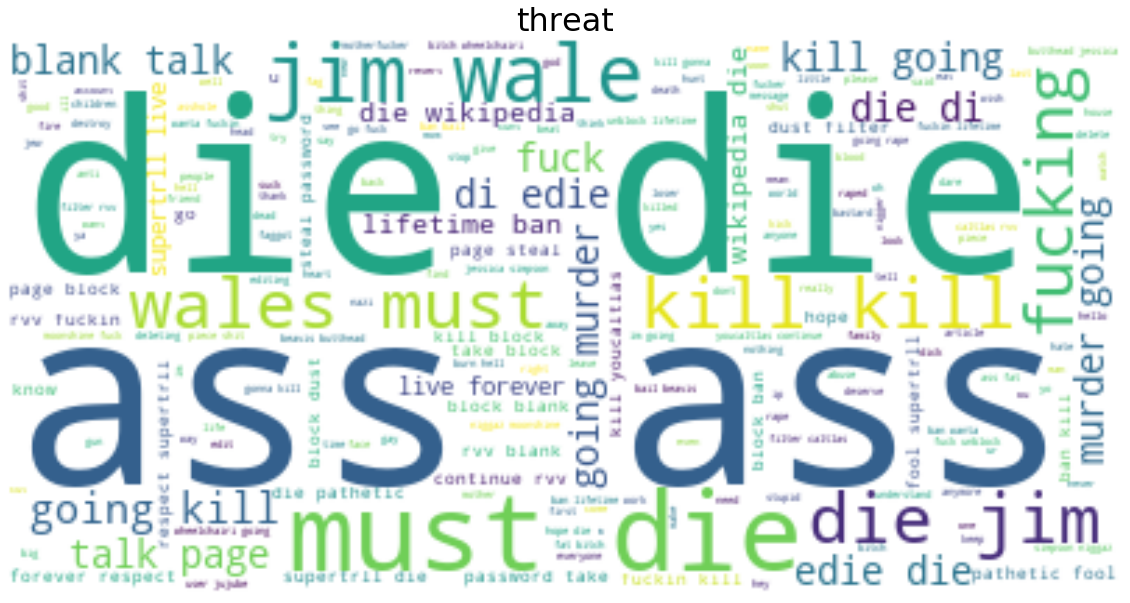

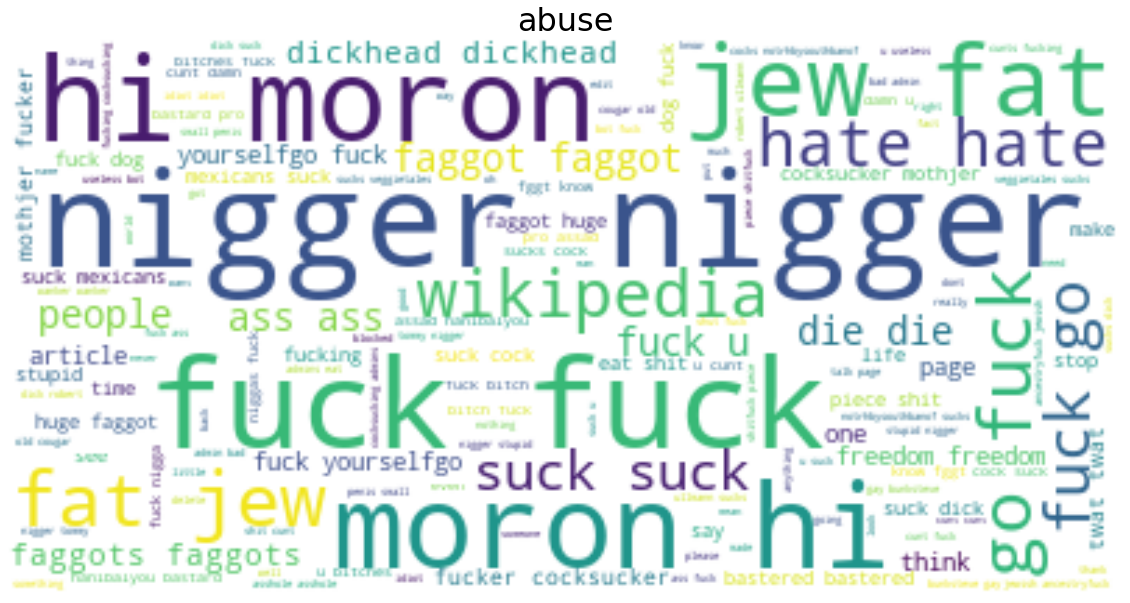

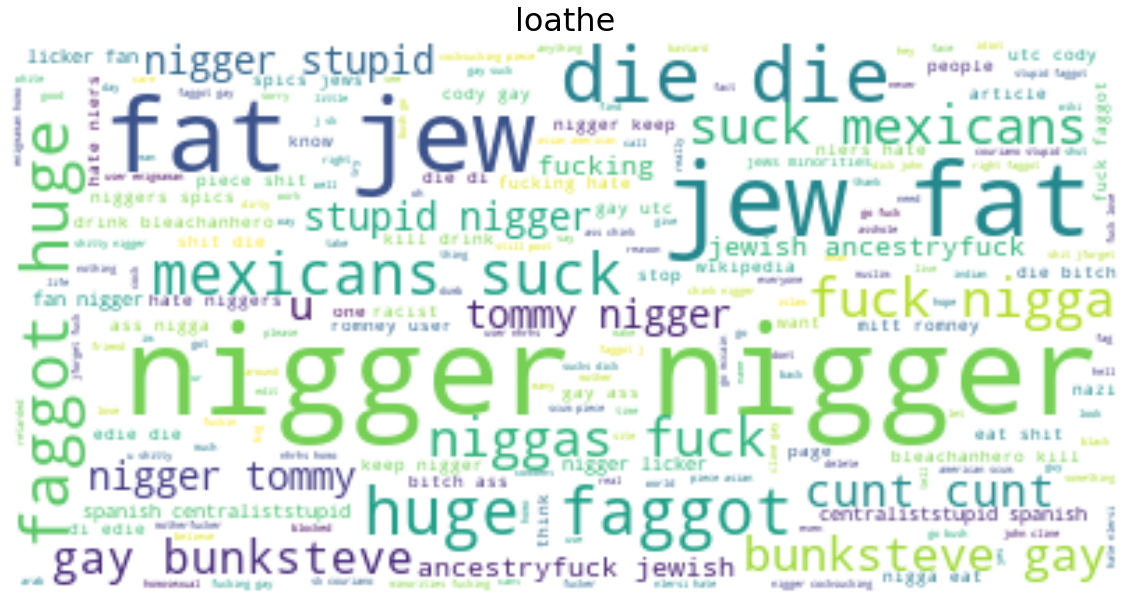

In [23]:
for i in cols_target:
    cat = train[train[i] == 1]
    all_cat = cat['comment_text'].str.split(' ')
    
    all_cat_cleaned = []

    for text in all_cat:
        text = [x.strip(string.punctuation) for x in text]
        all_cat_cleaned.append(text)

    all_cat_cleaned[0]

    cat_clean = [" ".join(text) for text in all_cat_cleaned]
    final_cat = " ".join(cat_clean)
    
    wordC = WordCloud(background_color="white").generate(final_cat)

    plt.figure(figsize = (20,20))
    plt.imshow(wordC, interpolation='bilinear')
    plt.axis("off")
    plt.title(i, fontsize = 32)
    plt.show()


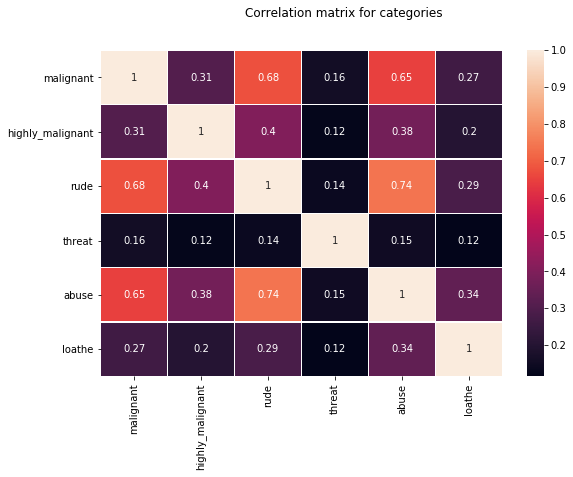

In [24]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(train[cols_target].corr(), annot=True, linewidths=.5, ax=ax)

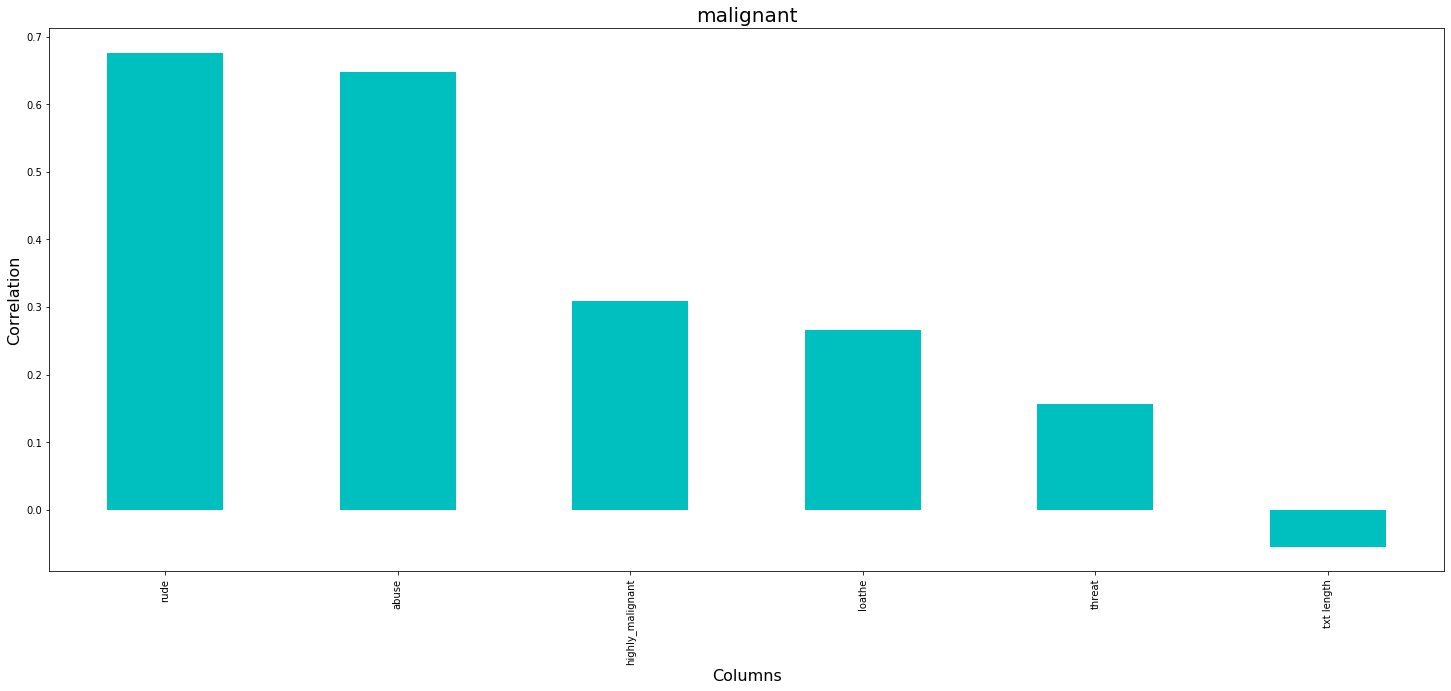

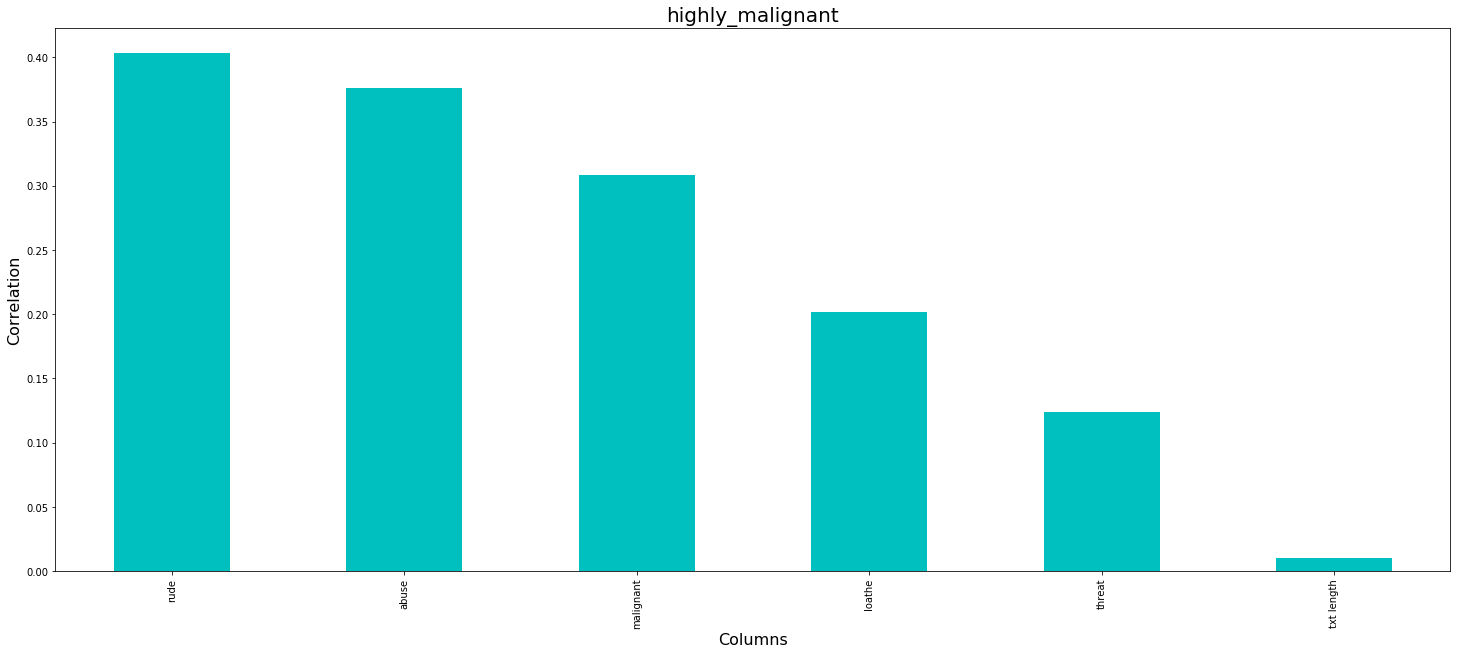

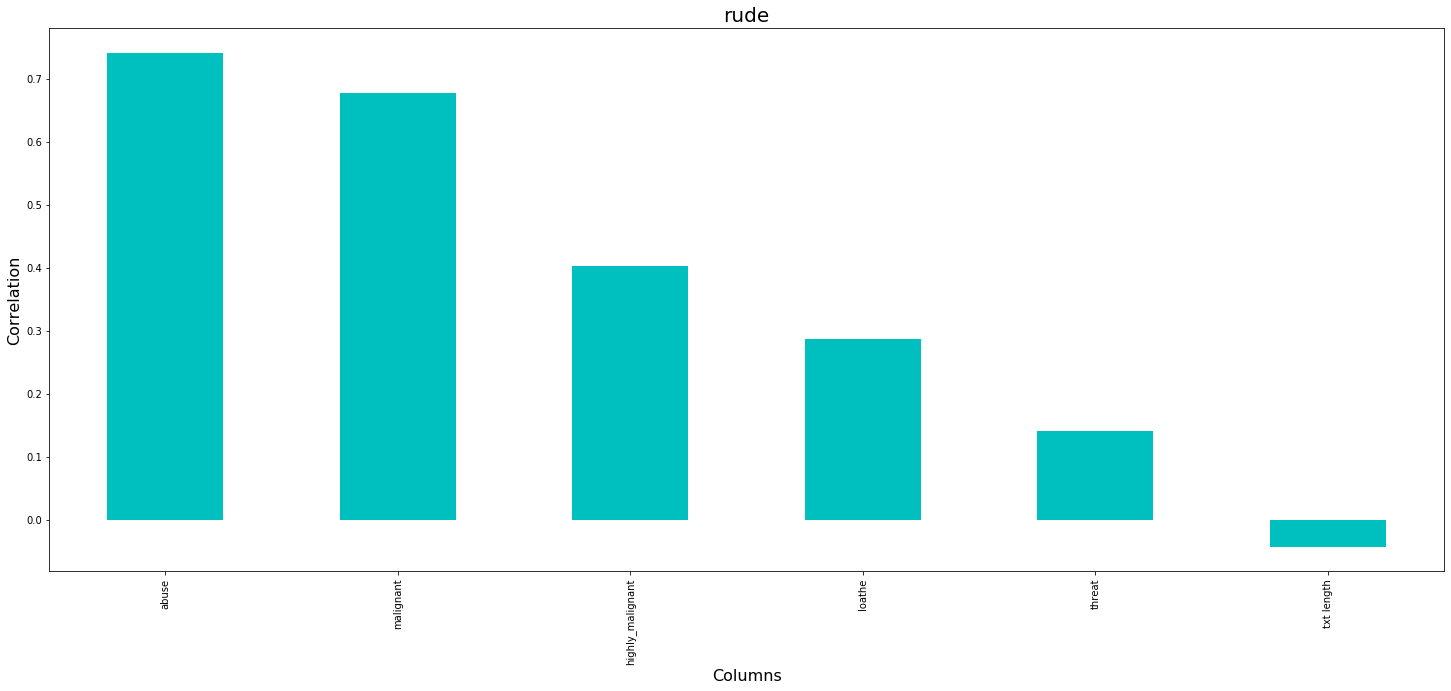

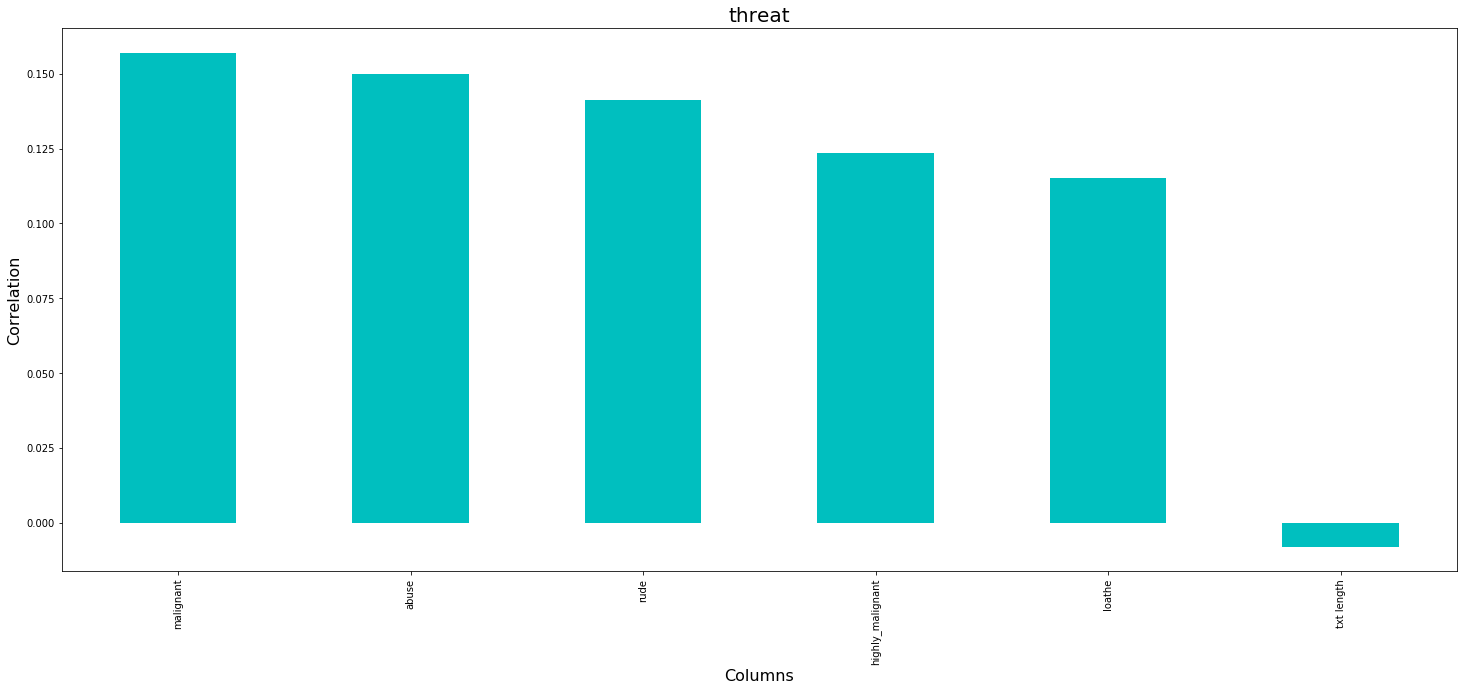

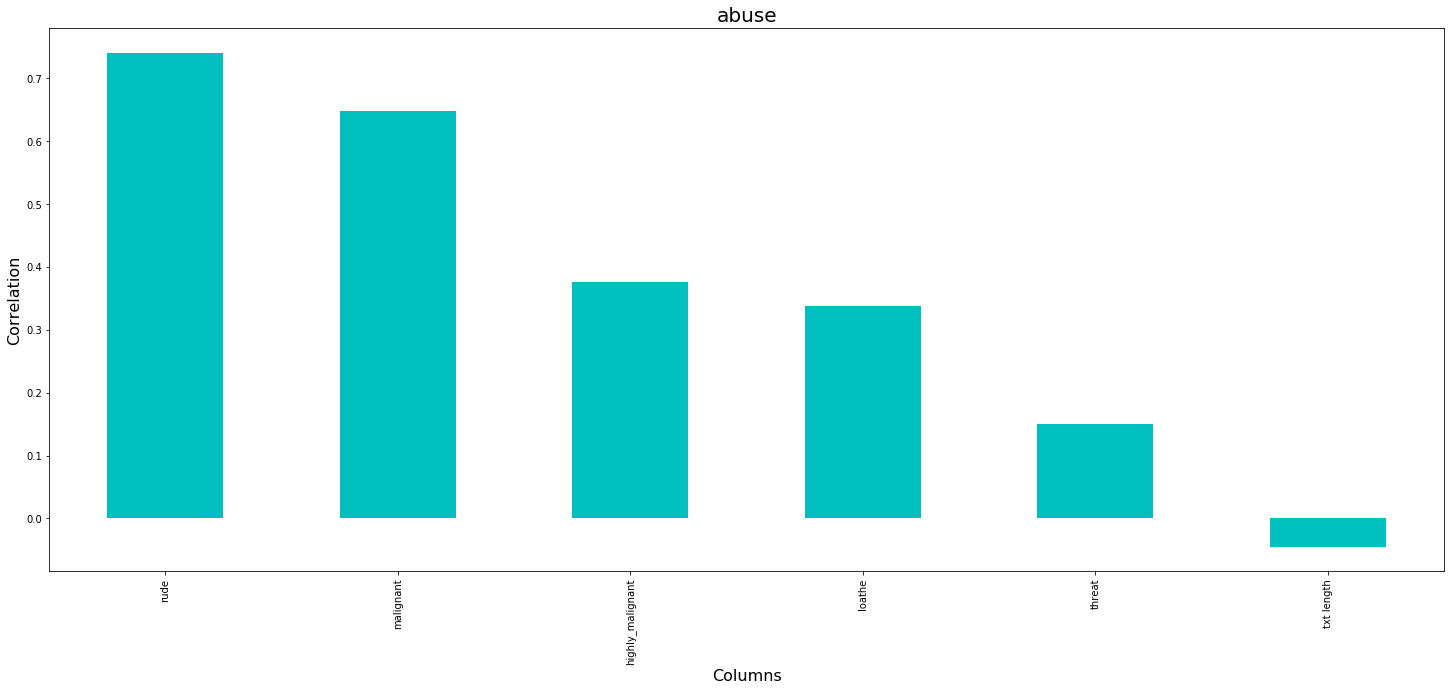

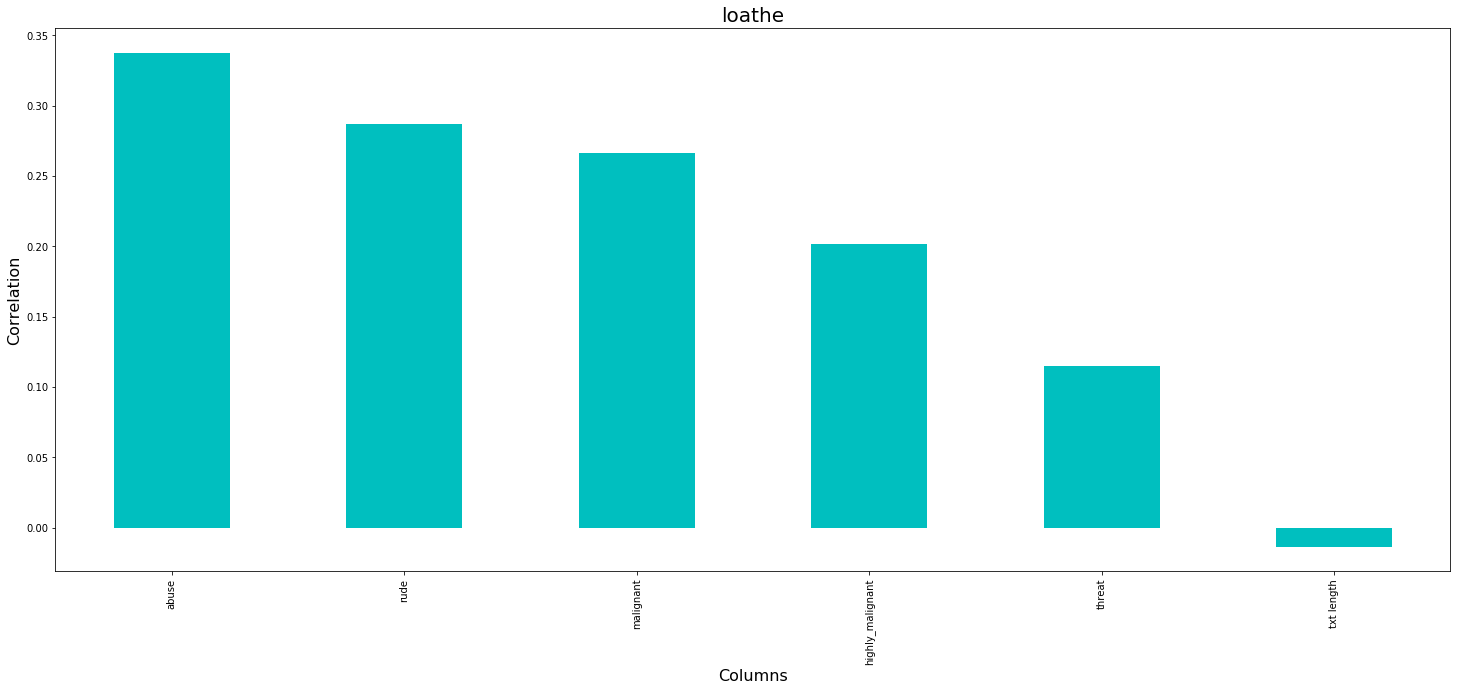

In [25]:
for i in cols_target:
    plt.figure(figsize = (25, 10))
    train.corr()[i].sort_values(ascending = False).drop([i]).plot(kind = 'bar', color = 'c')
    plt.xlabel('Columns', fontsize = 16)
    plt.ylabel('Correlation', fontsize = 16)
    plt.title(i, fontsize = 20)
    plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
X = train.comment_text

In [28]:
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [29]:
type (X)

pandas.core.series.Series

In [30]:
test_df = test.comment_text

In [31]:
X_train = vect.fit_transform(X.astype('U'))
X_test = vect.transform(test_df.astype('U'))

In [32]:
X_test

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2522970 stored elements in Compressed Sparse Row format>

In [33]:
X_train

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3018784 stored elements in Compressed Sparse Row format>

In [34]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=24.0)

In [55]:
submissionlr = pd.DataFrame()
submissionmnb = pd.DataFrame()
submissiondt = pd.DataFrame()
submissionrf = pd.DataFrame()

In [56]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_train)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    print(classification_report(y,y_pred_X))
    # compute the prediction for X_test
    test_y_prob = logreg.predict(X_test)
    print(test_y_prob.shape)
    submissionlr[label] = test_y_prob

... Processing malignant
Training accuracy is 0.9642353560484048
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    144277
           1       0.89      0.72      0.79     15294

    accuracy                           0.96    159571
   macro avg       0.93      0.85      0.89    159571
weighted avg       0.96      0.96      0.96    159571

(153164,)
... Processing highly_malignant
Training accuracy is 0.9924171685331294
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    157976
           1       0.71      0.41      0.52      1595

    accuracy                           0.99    159571
   macro avg       0.85      0.70      0.76    159571
weighted avg       0.99      0.99      0.99    159571

(153164,)
... Processing rude
Training accuracy is 0.9841449887510889
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    151122
           1       0

In [57]:
mnb = MultinomialNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [58]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using X_dtm & y
    mnb.fit(X_train, y)
    # compute the training accuracy
    y_pred_X = mnb.predict(X_train)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    print(classification_report(y,y_pred_X))
    # compute the prediction for X_test
    test_y_prob = mnb.predict(X_test)
    print(test_y_prob.shape)
    submissionmnb[label] = test_y_prob

... Processing malignant
Training accuracy is 0.9519774896441082
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    144277
           1       0.93      0.54      0.68     15294

    accuracy                           0.95    159571
   macro avg       0.94      0.77      0.83    159571
weighted avg       0.95      0.95      0.95    159571

(153164,)
... Processing highly_malignant
Training accuracy is 0.990856734619699
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    157976
           1       0.61      0.24      0.35      1595

    accuracy                           0.99    159571
   macro avg       0.80      0.62      0.67    159571
weighted avg       0.99      0.99      0.99    159571

(153164,)
... Processing rude
Training accuracy is 0.9749077213278102
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    151122
           1       0.

In [59]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using X_dtm & y
    dt.fit(X_train, y)
    # compute the training accuracy
    y_pred_X = dt.predict(X_train)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    print(classification_report(y,y_pred_X))
    # compute the prediction for X_test
    test_y_prob = dt.predict(X_test)
    print(test_y_prob.shape)
    submissiondt[label] = test_y_prob

... Processing malignant
Training accuracy is 0.9974494112338708
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144277
           1       1.00      0.98      0.99     15294

    accuracy                           1.00    159571
   macro avg       1.00      0.99      0.99    159571
weighted avg       1.00      1.00      1.00    159571

(153164,)
... Processing highly_malignant
Training accuracy is 0.9989847779358405
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    157976
           1       0.99      0.91      0.95      1595

    accuracy                           1.00    159571
   macro avg       0.99      0.95      0.97    159571
weighted avg       1.00      1.00      1.00    159571

(153164,)
... Processing rude
Training accuracy is 0.9985962361581991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151122
           1       1

In [60]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using X_dtm & y
    rf.fit(X_train, y)
    # compute the training accuracy
    y_pred_X = rf.predict(X_train)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    print(classification_report(y,y_pred_X))
    # compute the prediction for X_test
    test_y_prob = rf.predict(X_test)
    print(test_y_prob.shape)
    submissionrf[label] = test_y_prob

... Processing malignant
Training accuracy is 0.9974306108252753
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144277
           1       0.99      0.98      0.99     15294

    accuracy                           1.00    159571
   macro avg       1.00      0.99      0.99    159571
weighted avg       1.00      1.00      1.00    159571

(153164,)
... Processing highly_malignant
Training accuracy is 0.9989847779358405
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    157976
           1       0.98      0.91      0.95      1595

    accuracy                           1.00    159571
   macro avg       0.99      0.96      0.97    159571
weighted avg       1.00      1.00      1.00    159571

(153164,)
... Processing rude
Training accuracy is 0.9985837025524688
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151122
           1       0

In [61]:
import pickle

filename = 'MalComCalDTC.pkl'
pickle.dump(dt, open(filename, 'wb'))

In [62]:
submissiondt.to_csv('malcomcaldtsub.csv')